In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [113]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Low
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,Low
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Low
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,Low
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,Low


In [4]:
df.shape

(2443651, 9)

## Part 1: Understanding Product Categories

**Business Question:** What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

 **1. Frequency Tables:**

 - Generate a frequency table for the product category.
 - Which are the top 5 most listed product categories?

In [30]:
category_freq = df['category'].value_counts()

In [31]:
category_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [32]:
top_categories = category_freq.head(5)

In [33]:
print('The top 5 most listed product categories are:', list(top_categories.index))

The top 5 most listed product categories are: ['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories', 'Bath & Body', 'Birthday Gifts']


 **2. Visualizations:**

 - Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.



In [45]:
# Subset of categories with more than 10,000 products
subset = category_freq[category_freq > 10000]

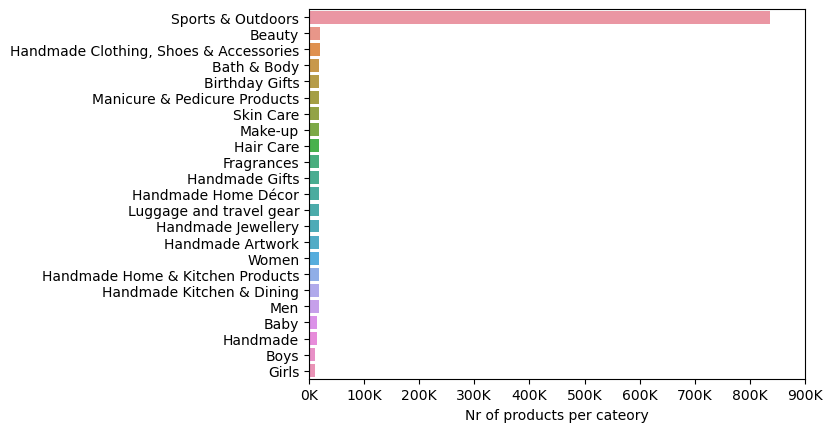

In [46]:
ax = sns.barplot(x=subset.values, y=subset.index)

ax.set_ylabel('')
ax.set_xlabel('Nr of products per cateory')
# Get the current y-axis tick labels
x_labels = ax.get_xticks()

# Format the labels to a simplified form (e.g., 10K for 10,000)
formatted_labels = [f"{int(label / 1000)}K" for label in x_labels]

# Set the new formatted labels and tick locations to the y-axis
ax.set_xticks(x_labels)
ax.set_xticklabels(formatted_labels)

plt.show()

In [44]:
# ax = sns.barplot(x=subset.index, y=subset.values)
# plt.xticks(rotation=45, ha="right")
# ax.set_xlabel('')

# # Get the current y-axis tick labels
# y_labels = ax.get_yticks()

# # Format the labels to a simplified form (e.g., 10K for 10,000)
# formatted_labels = [f"{int(label / 1000)}K" for label in y_labels]

# # Set the new formatted labels and tick locations to the y-axis
# ax.set_yticks(y_labels)
# ax.set_yticklabels(formatted_labels)

# plt.show()

 - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Text(0, 0.5, '')

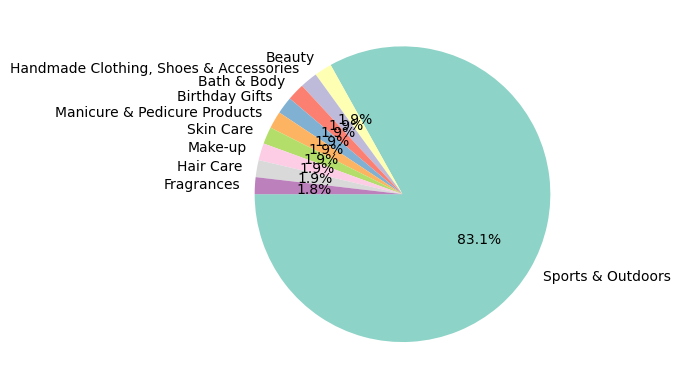

In [158]:
top_10 = category_freq.iloc[:10]

top_10.plot.pie(autopct='%1.1f%%', startangle=180, colors=sns.color_palette("Set3"))
plt.ylabel('')

The category dominating all others is **'Sports & Outdors'**

## Part 2: Delving into Product Pricing

**Business Question:** How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**1.Measures of Centrality:**

- Calculate the mean, median, and mode for the price of products.
 - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [6]:
def mean_med_mode(df):
    print(f"Mean:   {df.mean():.2f}")
    print(f"Median: {df.median()}")
    print(f"Mode:   {df.mode()[0]}")
    
mean_med_mode(df['price'])

Mean:   89.24
Median: 19.09
Mode:   9.99


- Average product price is almost 90, with a median of only 19.09. The most common price is only 9.99

- The values of mean, mode, and median suggest that some products have much higher prices, leading to an increase in the average price.


**2. Measures of Dispersion:**

 - Determine the variance, standard deviation, range, and interquartile range for product price.
 - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [40]:
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].quantile(0.5)
IQR = Q2 - Q1

In [41]:
IQR

9.1

In [84]:
def calc_stat(df):
    stat = {
        "Variance" : round(df.var(),2),
        "Standard deviation" : round(df.std(),2),
        "Max value" : df.max(),
        "Min value" : df.min(),
        "Range" : df.max() - df.min(),
        "Quantiles": df.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        "IQR" : df.quantile([0.75]).iloc[0] - df.quantile([0.25]).iloc[0]
    }
    
    for k,v in stat.items():
        print(f"{k}:\n{v}\n")

calc_stat(df['price'])


Variance:
119445.49

Standard deviation:
345.61

Max value:
100000.0

Min value:
0.0

Range:
100000.0

Quantiles:
0.1      5.99
0.2      8.99
0.3     11.77
0.4     14.99
0.5     19.09
0.6     25.49
0.7     36.00
0.8     60.49
0.9    149.99
Name: price, dtype: float64

IQR:
36.0



How varied are the product prices? Are there any indicators of a significant spread in prices?

- The huge range of prices, values of variance and stadard deviation indicate a big spread of product prices. 
- The quantiles values show that 90% of prices fall below 150, thus the products with much higher prices are less than 10% of all.
- The big standard deviation (345.6), is much higher than the average product price (~90), and since the product prices cannot be negative, this value (and the positive skew) indicate not only the big dispersion of values but also that the maxima of price distribution is shifted/skewed to the left.



**3. Visualizations:**

 - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..


In [74]:
# due to huge spread of product prices only the prices that fall within 90% of prices are plotted; otherwise histogram would not be very clear due to long tails in distribution

limit = df['price'].quantile([0.9])[0.9]
price_limit = df.loc[df['price'] < limit, 'price']

<Axes: xlabel='price', ylabel='Count'>

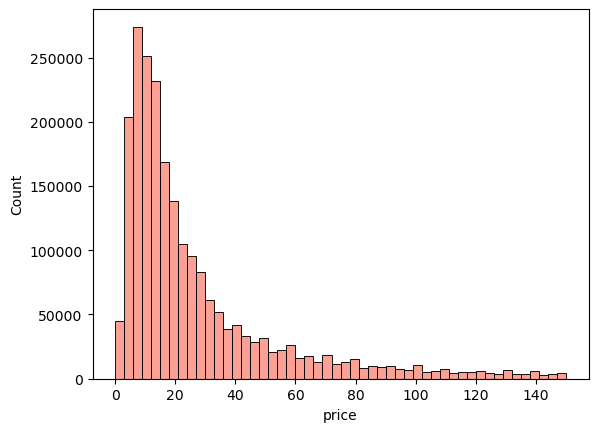

In [75]:
sns.histplot(data=price_limit, bins=50, color="salmon")

#  kde=True,

 - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: >

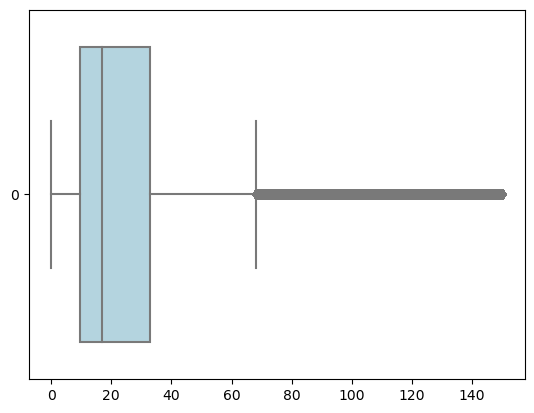

In [112]:
# When limited range of prices is used we can ibserve that 50% of prices is in the range approx. 10 to 35$ with mean value below 20$.

sns.boxplot(data = price_limit, color="lightblue", orient='h')

<Axes: >

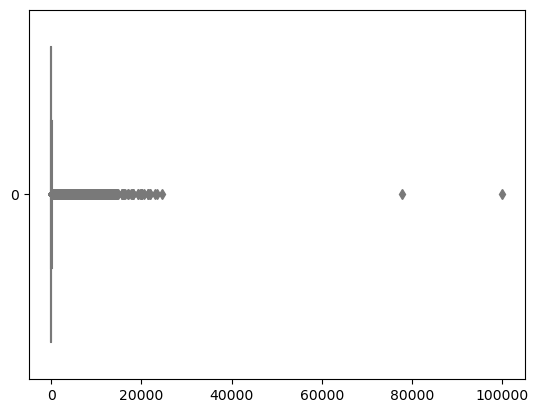

In [61]:
# When the full range of prices is used, the outliears dominate the plot, making it hard to read and interpret the results 

sns.boxplot(data = df['price'], color="lightblue", orient='h')

## Part 3: Unpacking Product Ratings

**Business Question:** How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**1. Measures of Centrality:**
 - Calculate the mean, median, and mode for the rating of products.
 - How do customers generally rate products? Is there a common trend?
 
 


In [4]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [85]:
mean_med_mode(df['stars'])

Mean:   2.15
Median: 0.0
Mode:   0.0


- The avergae rate of products is only 2.15 stars (out of 5).

- The dominant value is '0' that most probably denotes customers who didn't rate the products.

**2. Measures of Dispersion:**
- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback? 


In [86]:
calc_stat(df['stars'])

Variance:
4.82

Standard deviation:
2.19

Max value:
5.0

Min value:
0.0

Range:
5.0

Quantiles:
0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    4.0
0.7    4.3
0.8    4.5
0.9    4.7
Name: stars, dtype: float64

IQR:
4.4



- The IQR, where 50% of rates are found, is 4.4 which spans almost the whole range of possible values (0-5). The standard deviation is 2.19 which is rather big for considerend range. These values indicates that there is a wide variation in customer feedback.

**3.Shape of the Distribution:**
 - Calculate the skewness and kurtosis for the rating column.
 - Are the ratings normally distributed, or do they lean towards higher or lower values?



In [102]:
print("Skewness and kurtosis including stars qual to zero:")
print(f"Skewness: {df['stars'].skew()}")
print(f"Kurtosis: {df['stars'].kurtosis()}")
print()
print("Skewness and kurtosis excluding stars qual to zero (no rating):")
print(f"Skewness: {df['stars'][df['stars'] > 0].skew()}")
print(f"Kurtosis: {df['stars'][df['stars'] > 0].kurtosis()}")

Skewness and kurtosis including stars qual to zero:
Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985

Skewness and kurtosis excluding stars qual to zero (no rating):
Skewness: -2.3795681122127945
Kurtosis: 9.78193769066435


- The values of skewness and kurtosis are different when the 'zero' star is included or not - giving opposit results

- Assuming 'zero' star is luck of rating the analysis is done for results excluding this value:
    - skewness is negative so the distribution is skewed to the left (tail on the left side),
    - kurtosis value is greater than 3 indicating heavy tails (meaning more data points in the tails)

**4.Visualizations:**
 - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

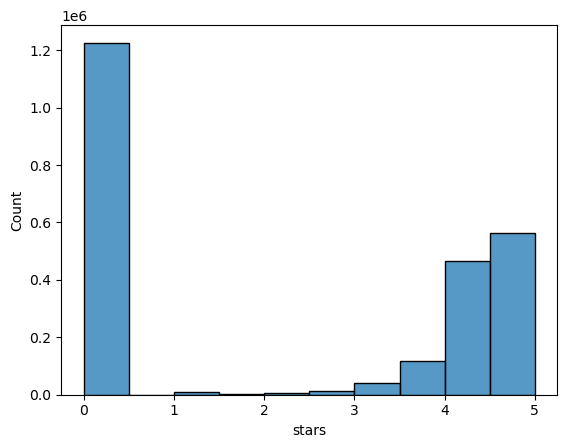

In [97]:
# Histogram including stars in range 0:5

sns.histplot(df['stars'], bins=10)

<Axes: xlabel='stars', ylabel='Count'>

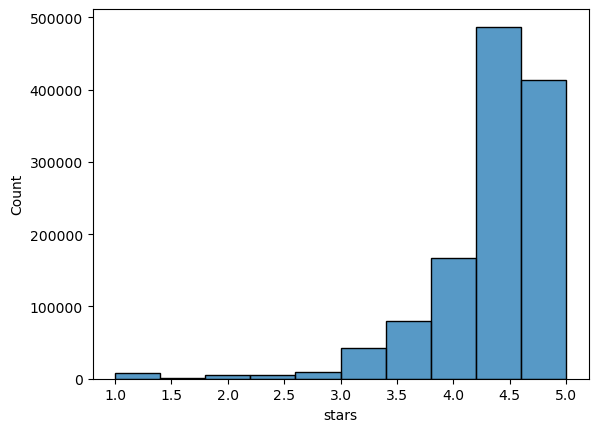

In [96]:
# Histogram without stars '0' - so probably no rating

sns.histplot(df['stars'][df['stars'] > 0], bins=10)